(**You can also open this notebook in Google Colab**)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/xiangshiyin/data-programming-with-python/blob/main/2023-fall/2023-09-26/notebook/code_demo.ipynb)

# Python basics - additional topics

## Library import in depth
### A simple Python package
Assume we have a package with the following file distribution
```md
└── sample_package
    └── sample.py
    └── subpackage
        └── subsample.py
```
The content of `sample.py` is like
```python
x = 123
y = 234

def hello():
    print('Hello World')
```

The content of `subsample.py`
```python
xx = 1
yy = 2
```

### Things might be more complicated
![](../pics/library_tree.png)

***You could***
* `import` the whole library, by `import a`
* `import` a module (python script), by `import a.aa`
* `import` a object (variable, function, class, etc.) in a module, by `import a.aa.aaa`, or `from a.aa import aaa`


**However**, you should keep using the `<object>` name in the `import <object>` statement in your program to reference the object you imported. **Sometimes, this could be quite inconvenient** because the `<object>` string could be pretty long due to the complicatedd file structures in the python library

**There are two ways** to solve the problem:
* `from a import aa` (use the `from` statement to reference the complicated folder relationships)
* `import a.aa as aa` (create an alias)

In [1]:
%%sh

tree sample_package

sample_package
├── sample.py
└── subpackage
    └── subsample.py

2 directories, 2 files


In [2]:
from sample_package.sample import hello
hello()

Hello World


In [3]:
from sample_package.subpackage.subsample import xx

In [4]:
xx

1

In [5]:
from sample_package.subpackage.subsample import yy
yy

2

In [7]:
import sample_package.subpackage.subsample.xx as longxx

ModuleNotFoundError: No module named 'sample_package.subpackage.subsample.xx'; 'sample_package.subpackage.subsample' is not a package

In [10]:
import sample_package.subpackage.subsample as longpath

In [11]:
longpath.xx

1

In [12]:
longpath.yy

2

# `pandas` continued

In [13]:
import pandas as pd
import numpy as np

## Create `dataframe` from files

### `csv` file

In [14]:
df1 = pd.read_csv('../data/imf-gdp-per-capita-2015.csv',sep=',',header=0, thousands=',')
df1.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        189 non-null    object 
 1   Subject Descriptor             189 non-null    object 
 2   Units                          189 non-null    object 
 3   Scale                          189 non-null    object 
 4   Country/Series-specific Notes  188 non-null    object 
 5   2015                           187 non-null    float64
 6   Estimates Start After          188 non-null    float64
dtypes: float64(2), object(5)
memory usage: 10.5+ KB


### `excel` file

In [16]:
df2 = pd.read_excel(io='../data/excel-test-file.xlsx', sheet_name='tab1', header=0)
df2.head(3)

,col1,col2,col3
0,1,a,a12
1,2,b,b23
2,3,c,c31


In [17]:
df3 = pd.read_excel(io='../data/excel-test-file.xlsx',sheet_name='tab2',header=0)
df3.head(3)

,col4,col5
0,d,4
1,e,5
2,f,6


## Different ways to select a subset of a `dataframe`

| Type                  | Notes                                       |
|-----------------------|---------------------------------------------|
| `df[column]`          | Select by column labels                     |
| `df.loc[rows]`        | Select by row labels                        |
| `df.loc[:, cols]`     | Select by column labels                     |
| `df.loc[rows, cols]`  | Select by row and column labels             |
| `df.iloc[rows]`       | Select by row positional indices            |
| `df.iloc[:, cols]`    | Select by column positional indices         |
| `df.iloc[rows, cols]` | Select by row and column positional indices |
| `df.at[row, col]`     | Select an element by row and column labels  |
| `df.iat[row, col]`    | Select an element by row and column indices |

### `Reindex`
Create a new object with the values rearranged to align with the new index

#### On `series`

In [18]:
x = pd.Series([4.5, 7.2, -5.3, 3.6], index=["d", "b", "a", "c"])

In [19]:
x

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [20]:
y = x.reindex(["a", "b", "c", "d", "e"])
y

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

#### On `dataframe`

In [21]:
df = pd.DataFrame(
    np.arange(9).reshape(3,3),
    index=['a', 'c', 'd'],
    columns=['Ohio', 'Texas', 'California']
)

df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [22]:
df2 = df.reindex(index=['a', 'b', 'c', 'd'])
df2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [23]:
df3 = df.reindex(columns=['Texas', 'Utah', 'California'])
df3

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


## Missing values

`pandas` primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data) from `pandas` official documentation for more details.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

### Introduce missing value to data

In [24]:
import pandas as pd
import numpy as np

In [25]:
dates = pd.date_range(start='2020-08-25', end='2020-10-01', freq='7D')
dates

DatetimeIndex(['2020-08-25', '2020-09-01', '2020-09-08', '2020-09-15',
               '2020-09-22', '2020-09-29'],
              dtype='datetime64[ns]', freq='7D')

In [26]:
df1 = df.reindex(index=dates[:6],columns=list(df.columns)+['G'])
df1

,Ohio,Texas,California,G
2020-08-25,NaN,NaN,NaN,NaN
2020-09-01,NaN,NaN,NaN,NaN
2020-09-08,NaN,NaN,NaN,NaN
2020-09-15,NaN,NaN,NaN,NaN
2020-09-22,NaN,NaN,NaN,NaN
2020-09-29,NaN,NaN,NaN,NaN


In [27]:
# fill in values at some locations
df1.loc['2020-08-25':'2020-09-08','G'] = 1
df1

,Ohio,Texas,California,G
2020-08-25,NaN,NaN,NaN,1.0
2020-09-01,NaN,NaN,NaN,1.0
2020-09-08,NaN,NaN,NaN,1.0
2020-09-15,NaN,NaN,NaN,NaN
2020-09-22,NaN,NaN,NaN,NaN
2020-09-29,NaN,NaN,NaN,NaN


In [28]:
# to get the boolean mask where values are nan
df1.isna()

,Ohio,Texas,California,G
2020-08-25,True,True,True,False
2020-09-01,True,True,True,False
2020-09-08,True,True,True,False
2020-09-15,True,True,True,True
2020-09-22,True,True,True,True
2020-09-29,True,True,True,True


In [29]:
# you can also do
pd.isna(df1)

,Ohio,Texas,California,G
2020-08-25,True,True,True,False
2020-09-01,True,True,True,False
2020-09-08,True,True,True,False
2020-09-15,True,True,True,True
2020-09-22,True,True,True,True
2020-09-29,True,True,True,True


You could also do the following ...

In [30]:
df1.notna()

,Ohio,Texas,California,G
2020-08-25,False,False,False,True
2020-09-01,False,False,False,True
2020-09-08,False,False,False,True
2020-09-15,False,False,False,False
2020-09-22,False,False,False,False
2020-09-29,False,False,False,False


In [31]:
pd.notna(df1)

,Ohio,Texas,California,G
2020-08-25,False,False,False,True
2020-09-01,False,False,False,True
2020-09-08,False,False,False,True
2020-09-15,False,False,False,False
2020-09-22,False,False,False,False
2020-09-29,False,False,False,False


In [37]:
# drop any rows that have missing values
df2 = df1.copy()
df2['Ohio'] = 5
# df2.dropna(how='any')
df2

,Ohio,Texas,California,G
2020-08-25,5,NaN,NaN,1.0
2020-09-01,5,NaN,NaN,1.0
2020-09-08,5,NaN,NaN,1.0
2020-09-15,5,NaN,NaN,NaN
2020-09-22,5,NaN,NaN,NaN
2020-09-29,5,NaN,NaN,NaN


In [38]:
df2.dropna(how='any')

,Ohio,Texas,California,G


In [39]:
df2.dropna(axis=1)

,Ohio
2020-08-25,5
2020-09-01,5
2020-09-08,5
2020-09-15,5
2020-09-22,5
2020-09-29,5


In [40]:
df2.dropna(axis=0)

,Ohio,Texas,California,G


In [41]:
df2 # df2 is not impacted since the inplace flag is not flipped

,Ohio,Texas,California,G
2020-08-25,5,NaN,NaN,1.0
2020-09-01,5,NaN,NaN,1.0
2020-09-08,5,NaN,NaN,1.0
2020-09-15,5,NaN,NaN,NaN
2020-09-22,5,NaN,NaN,NaN
2020-09-29,5,NaN,NaN,NaN


In [42]:
df1

,Ohio,Texas,California,G
2020-08-25,NaN,NaN,NaN,1.0
2020-09-01,NaN,NaN,NaN,1.0
2020-09-08,NaN,NaN,NaN,1.0
2020-09-15,NaN,NaN,NaN,NaN
2020-09-22,NaN,NaN,NaN,NaN
2020-09-29,NaN,NaN,NaN,NaN


In [44]:
# fill missing values
df1.fillna(value=-1)

,Ohio,Texas,California,G
2020-08-25,-1.0,-1.0,-1.0,1.0
2020-09-01,-1.0,-1.0,-1.0,1.0
2020-09-08,-1.0,-1.0,-1.0,1.0
2020-09-15,-1.0,-1.0,-1.0,-1.0
2020-09-22,-1.0,-1.0,-1.0,-1.0
2020-09-29,-1.0,-1.0,-1.0,-1.0


### What represents `missing/Null` value

* When viewing a dataframe/series with missing value, these are the common markers indicating missing/null values
  * `NaN`
  * `None`
  * `NaT`
* In terms of the actual values, here are the common markers
  * `np.nan` - the primary marker used to represent missing values in pandas. It is a special floating-point value that can be used for numerical and non-numerical data types. You can use pandas methods like `isna()`, `isnull()`, `fillna()`, and others to work with `np.nan` values.
  * `None` - the built-in Python None type
  * Custom missing value markers - depends on the actual data you have
    * Could be empty string
    * Could be intuitive string values of `N/A`, `NULL`, etc.
* In `pd.read_csv()` and `pd.read_excel()`, you could use the `na_values` parameter to tell pandas what should be treated as missing/null values
  * [*read_csv()*](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
  * [*read_excel()*](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [46]:
s = pd.Series([1., 2., 3.])
s.loc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

In [47]:
s = pd.Series(["a", "b", "c"])
s.loc[1] = np.nan
s

0      a
1    NaN
2      c
dtype: object

In [48]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    index=["a", "c", "e", "f", "h"],
    columns=["one", "two", "three"],
)

df['timestamp'] = pd.Timestamp("20120101")
# df.loc['f', 'timestamp'] = None
df

,one,two,three,timestamp
a,-1.215764,-0.267142,1.850655,2012-01-01
c,-1.377801,1.165753,-0.202368,2012-01-01
e,-0.251823,0.817859,1.662098,2012-01-01
f,-0.685601,-0.042342,-0.364644,2012-01-01
h,-0.575955,-0.164848,0.291935,2012-01-01


In [49]:
df.loc['f', 'timestamp'] = None
df

,one,two,three,timestamp
a,-1.215764,-0.267142,1.850655,2012-01-01
c,-1.377801,1.165753,-0.202368,2012-01-01
e,-0.251823,0.817859,1.662098,2012-01-01
f,-0.685601,-0.042342,-0.364644,NaT
h,-0.575955,-0.164848,0.291935,2012-01-01


## Operations on `dataframe`

**Stats**

In [50]:
df = pd.DataFrame(
    np.arange(9).reshape(3,3),
    index=['a', 'c', 'd'],
    columns=['Ohio', 'Texas', 'California']
)

df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [51]:
df.describe()

,Ohio,Texas,California
count,3.0,3.0,3.0
mean,3.0,4.0,5.0
std,3.0,3.0,3.0
min,0.0,1.0,2.0
25%,1.5,2.5,3.5
50%,3.0,4.0,5.0
75%,4.5,5.5,6.5
max,6.0,7.0,8.0


In [52]:
df['Ohio'].mean()

3.0

In [53]:
# df.mean()
list(df.mean())

[3.0, 4.0, 5.0]

In [54]:
df.mean()

Ohio          3.0
Texas         4.0
California    5.0
dtype: float64

In [55]:
df.mean().values

array([3., 4., 5.])

In [56]:
df.mean(axis=0)

Ohio          3.0
Texas         4.0
California    5.0
dtype: float64

In [57]:
df.mean(axis=1)

a    1.0
c    4.0
d    7.0
dtype: float64

In [58]:
df['Ohio'].max()

6

**Histogram**

In [59]:
df

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [60]:
df['histcol'] = np.random.randint(0,3,size=3)
df

,Ohio,Texas,California,histcol
a,0,1,2,2
c,3,4,5,1
d,6,7,8,2


In [61]:
df.histcol.value_counts()

histcol
2    2
1    1
Name: count, dtype: int64

In [62]:
df.histcol.unique()

array([2, 1])

In [63]:
df.histcol.nunique()

2

<Axes: >

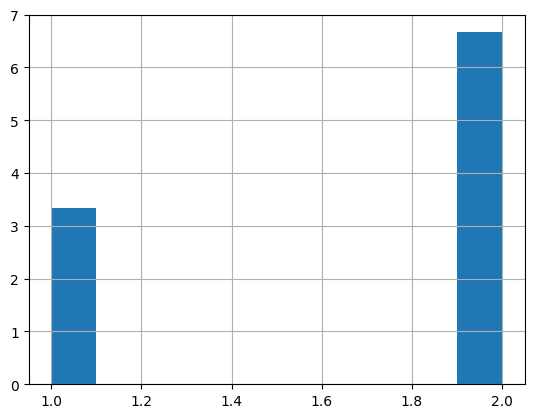

In [66]:
# df.histcol.hist()
df.histcol.hist(density=True)

**Apply functions/logics to the data**

In [67]:
df

,Ohio,Texas,California,histcol
a,0,1,2,2
c,3,4,5,1
d,6,7,8,2


In [68]:
df.apply(np.cumsum) # apply the function on all columns

,Ohio,Texas,California,histcol
a,0,1,2,2
c,3,5,7,3
d,9,12,15,5


In [69]:
df.apply(lambda x: -x) # apply the function on all columns

,Ohio,Texas,California,histcol
a,0,-1,-2,-2
c,-3,-4,-5,-1
d,-6,-7,-8,-2


In [72]:
# this defines a lambda expression/function
f = lambda x: -x

In [73]:
f(2)

-2

In [ ]:
# def f(x):
#     return -x

In [75]:
df

,Ohio,Texas,California,histcol
a,0,1,2,2
c,3,4,5,1
d,6,7,8,2


In [74]:
df.apply(f)

,Ohio,Texas,California,histcol
a,0,-1,-2,-2
c,-3,-4,-5,-1
d,-6,-7,-8,-2


In [70]:
df

,Ohio,Texas,California,histcol
a,0,1,2,2
c,3,4,5,1
d,6,7,8,2


In [71]:
df.California.map(lambda x: x+1) # apply the function on one single column

a    3
c    6
d    9
Name: California, dtype: int64

In [76]:
df

,Ohio,Texas,California,histcol
a,0,1,2,2
c,3,4,5,1
d,6,7,8,2


In [77]:
df['newCol'] = [(i+1)**2 for i in range(df.shape[0])]

In [79]:
df

,Ohio,Texas,California,histcol,newCol
a,0,1,2,2,1
c,3,4,5,1,4
d,6,7,8,2,9


## `dataframe` and table operations

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['a','b','c','d'])
df

**Concat**

In [ ]:
pieces = [df[:3], df[7:]]
print("pieces:\n", pieces)
print("put back together:\n")
# pd.concat(pieces, axis=1)
pd.concat(pieces, axis=0)

**Joins**

More details at https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
![](../pics/joins.jpg)

In [80]:
tb1 = pd.DataFrame({'key': ['foo', 'boo', 'foo'], 'lval': [1, 2, 3]})
tb2 = pd.DataFrame({'key': ['foo', 'coo'], 'rval': [5, 6]})

In [81]:
tb1

,key,lval
0,foo,1
1,boo,2
2,foo,3


In [82]:
tb2

,key,rval
0,foo,5
1,coo,6


In [83]:
pd.merge(tb1, tb2, on='key', how='inner')

,key,lval,rval
0,foo,1,5
1,foo,3,5


In [84]:
pd.merge(tb1, tb2, on='key', how='left')

,key,lval,rval
0,foo,1,5.0
1,boo,2,NaN
2,foo,3,5.0


In [85]:
pd.merge(tb1, tb2, on='key', how='right')

,key,lval,rval
0,foo,1.0,5
1,foo,3.0,5
2,coo,NaN,6


In [86]:
tb2

,key,rval
0,foo,5
1,coo,6


In [87]:
tb1

,key,lval
0,foo,1
1,boo,2
2,foo,3


In [88]:
pd.merge(tb1, tb2, on='key', how='outer')

,key,lval,rval
0,foo,1.0,5.0
1,foo,3.0,5.0
2,boo,2.0,NaN
3,coo,NaN,6.0


In [89]:
type(np.nan)

float

In [92]:
outer_join = pd.merge(tb1, tb2, on='key', how='outer')
# outer_join.lval = outer_join.lval.astype(int)
# outer_join ## find a way to make the column to int type instead of float type

,key,lval,rval
0,foo,1.0,5.0
1,foo,3.0,5.0
2,boo,2.0,NaN
3,coo,NaN,6.0


**Grouping**

By `group by` we are referring to a process involving one or more of the following steps

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure
See the Grouping section from the `pandas` official documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html

In [93]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.638045,-1.860860
1,bar,one,-0.173690,0.794821
2,foo,two,0.679506,-0.066470
3,bar,three,-1.008860,-0.375602
4,foo,two,0.151686,-0.190021
5,bar,two,0.122010,-0.395917
6,foo,one,-1.745637,0.150031
7,foo,three,-1.657749,0.314664


In [94]:
df.groupby('A')['C'].mean().reset_index() # simple stats grouped by 1 column

,A,C
0,bar,-0.353513
1,foo,-0.386830


In [97]:
df.groupby('A')['C'].mean()

A
bar   -0.353513
foo   -0.386830
Name: C, dtype: float64

In [95]:
df.groupby(['A','B']).sum().reset_index() # simple stats grouped by multiple columns

,A,B,C,D
0,bar,one,-0.173690,0.794821
1,bar,three,-1.008860,-0.375602
2,bar,two,0.122010,-0.395917
3,foo,one,-1.107592,-1.710828
4,foo,three,-1.657749,0.314664
5,foo,two,0.831192,-0.256490


In [98]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.173690  0.794821
    three -1.008860 -0.375602
    two    0.122010 -0.395917
foo one   -1.107592 -1.710828
    three -1.657749  0.314664
    two    0.831192 -0.256490

In [96]:
df.groupby(['A','B']).mean().reset_index() # simple stats grouped by multiple columns

,A,B,C,D
0,bar,one,-0.173690,0.794821
1,bar,three,-1.008860,-0.375602
2,bar,two,0.122010,-0.395917
3,foo,one,-0.553796,-0.855414
4,foo,three,-1.657749,0.314664
5,foo,two,0.415596,-0.128245


## Write/Export `dataframe` to files

**CSV file**

In [102]:
df

,A,B,C,D
0,foo,one,0.638045,-1.860860
1,bar,one,-0.173690,0.794821
2,foo,two,0.679506,-0.066470
3,bar,three,-1.008860,-0.375602
4,foo,two,0.151686,-0.190021
5,bar,two,0.122010,-0.395917
6,foo,one,-1.745637,0.150031
7,foo,three,-1.657749,0.314664


In [99]:
df.to_csv('../data/to-csv-test.csv',sep=',',header=True)

**Excel spreadsheet**

In [101]:
df.to_excel('../data/to-excel-test.xlsx',sheet_name='tab1',header=True,index=None)

In [103]:
df.to_excel('../data/to-excel-test.xlsx',sheet_name='tab2',header=True) # how to append new tabs to the same spreadsheet

# Pandas Exercise

Microsoft created a long time ago the fictitious multinational manufacturing company called Adventure Works and shipped the AdventureWorks database as part of SQL Server.

**TASK**
1. write the Python Pandas expression to produce a table as described in the problem statements.
2. The SQL expression may give you a hint. It also allows you to see both systems side-by-side.
3. If you don't know SQL just ignore the SQL code.

In [104]:
import pandas as pd
import numpy as np

In [105]:
pd.set_option('display.max_columns',None) #unlimited
pd.set_option('display.max_rows',None)

## import the dataset

In [106]:
%%time

Employees = pd.read_excel('../data/Employees.xls')
Territory = pd.read_excel('../data/SalesTerritory.xls')
Customers = pd.read_excel('../data/Customers.xls')
Orders = pd.read_excel('../data/ItemsOrdered.xls')

CPU times: user 34.7 ms, sys: 2.51 ms, total: 37.2 ms
Wall time: 38.8 ms


In [107]:
Employees.head(3)

,EmployeeID,ManagerID,TerritoryID,Title,FirstName,MiddleName,LastName,Suffix,JobTitle,NationalIDNumber,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,PhoneNumber,PhoneNumberType,EmailAddress,AddressLine1,AddressLine2,City,StateProvinceName,PostalCode,CountryName
0,259,250.0,NaN,NaN,Ben,T,Miller,NaN,Buyer,20269531,1967-07-05,M,M,2004-04-09,0,55,47,151-555-0113,Work,ben0@adventure-works.com,101 Candy Rd.,NaN,Redmond,Washington,98052,United States
1,278,274.0,6.0,NaN,Garrett,R,Vargas,NaN,Sales Representative,234474252,1969-03-07,M,M,2005-07-01,1,33,36,922-555-0165,Work,garrett1@mapleleafmail.ca,10203 Acorn Avenue,NaN,Calgary,Alberta,T2P 2G8,Canada
2,204,26.0,NaN,NaN,Gabe,B,Mares,NaN,Production Technician - WC40,440379437,1982-06-11,M,M,2003-04-09,0,57,48,310-555-0117,Work,gabe0@adventure-works.com,1061 Buskrik Avenue,NaN,Edmonds,Washington,98020,United States


In [108]:
Employees.shape

(291, 26)

In [109]:
Territory.head(3)

,TerritoryID,Name,CountryCode,Region,SalesYTD,SalesLastYear
0,1,Northwest,US,North America,7887186.79,3298694.49
1,2,Northeast,US,North America,2402176.85,3607148.94
2,3,Central,US,North America,3072175.12,3205014.08


In [110]:
Territory.shape

(12, 6)

In [111]:
Territory

,TerritoryID,Name,CountryCode,Region,SalesYTD,SalesLastYear
0,1,Northwest,US,North America,7887186.79,3298694.490
1,2,Northeast,US,North America,2402176.85,3607148.940
2,3,Central,US,North America,3072175.12,3205014.080
3,4,Southwest,US,North America,10510853.87,5366575.710
4,5,Southeast,US,North America,2538667.25,3925071.430
5,6,Canada,CA,North America,6771829.14,5693988.860
6,7,France,FR,Europe,4772398.31,2396539.760
7,8,Germany,DE,Europe,3805202.35,1307949.790
8,9,Australia,AU,Pacific,5977814.92,2278548.980
9,10,United Kingdom,GB,Europe,5012905.37,1635823.400


In [112]:
Customers.head(3)

,CustomerID,SalesTerritoryID,FirstName,LastName,City,StateName
0,10101,1,John,Gray,Lynden,Washington
1,10298,4,Leroy,Brown,Pinetop,Arizona
2,10299,1,Elroy,Keller,Snoqualmie,Washington


In [114]:
Customers.head()

,CustomerID,SalesTerritoryID,FirstName,LastName,City,StateName
0,10101,1,John,Gray,Lynden,Washington
1,10298,4,Leroy,Brown,Pinetop,Arizona
2,10299,1,Elroy,Keller,Snoqualmie,Washington
3,10315,3,Lisa,Jones,Oshkosh,Wisconsin
4,10325,1,Ginger,Schultz,Pocatello,Idaho


In [113]:
Customers.shape

(17, 6)

In [115]:
Orders.head(3)

,CustomerID,OrderDate,Item,Quantity,Price
0,10330,2004-06-30,Pogo stick,1,28.0
1,10101,2004-06-30,Raft,1,58.0
2,10298,2004-07-01,Skateboard,1,33.0


In [116]:
Orders.shape

(32, 5)

## Filtering

### Provide a list of employees that are married

SQL logic
```sql
SELECT 
  e.EmployeeID
  , e.FirstName
  , e.LastName 
FROM dbo.Employees AS e
WHERE e.MaritalStatus = 'M'
LIMIT 3;
```

In [117]:
Employees.head(3)

,EmployeeID,ManagerID,TerritoryID,Title,FirstName,MiddleName,LastName,Suffix,JobTitle,NationalIDNumber,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,PhoneNumber,PhoneNumberType,EmailAddress,AddressLine1,AddressLine2,City,StateProvinceName,PostalCode,CountryName
0,259,250.0,NaN,NaN,Ben,T,Miller,NaN,Buyer,20269531,1967-07-05,M,M,2004-04-09,0,55,47,151-555-0113,Work,ben0@adventure-works.com,101 Candy Rd.,NaN,Redmond,Washington,98052,United States
1,278,274.0,6.0,NaN,Garrett,R,Vargas,NaN,Sales Representative,234474252,1969-03-07,M,M,2005-07-01,1,33,36,922-555-0165,Work,garrett1@mapleleafmail.ca,10203 Acorn Avenue,NaN,Calgary,Alberta,T2P 2G8,Canada
2,204,26.0,NaN,NaN,Gabe,B,Mares,NaN,Production Technician - WC40,440379437,1982-06-11,M,M,2003-04-09,0,57,48,310-555-0117,Work,gabe0@adventure-works.com,1061 Buskrik Avenue,NaN,Edmonds,Washington,98020,United States


In [118]:
Employees.MaritalStatus.nunique()

2

In [119]:
Employees.MaritalStatus.unique()

array(['M', 'S'], dtype=object)

In [123]:
Employees.Gender.nunique()

2

In [124]:
Employees.Gender.unique()

array(['M', 'F'], dtype=object)

```sql
SELECT 
  e.EmployeeID
  , e.FirstName
  , e.LastName 
FROM dbo.Employees AS e
WHERE e.MaritalStatus = 'M'
  AND e.Gender = 'F'
LIMIT 3;
```

In [126]:
## select by condition
## (con1) & (con2)
## con1 and con2
Employees.loc[(Employees.MaritalStatus == 'M') & (Employees.Gender=='F'), ['EmployeeID', 'FirstName', 'LastName', 'Gender']].head(3)

,EmployeeID,FirstName,LastName,Gender
15,192,Brenda,Diaz,F
19,245,Barbara,Moreland,F
27,147,Sandra,Reátegui Alayo,F


In [132]:
Employees.loc[(Employees.MaritalStatus == 'M') & (Employees.Gender=='F'), ['EmployeeID', 'FirstName', 'LastName', 'Gender']].shape[0]

49

In [131]:
## why this doesn't work

# Employees.loc[(Employees.MaritalStatus == 'M') and (Employees.Gender=='F'), ['EmployeeID', 'FirstName', 'LastName', 'Gender']].shape[0]


In [ ]:
Employees.loc[Employees.MaritalStatus == 'M', ['EmployeeID', 'FirstName', 'LastName']].head(3)

In [122]:
Employees.loc[Employees.MaritalStatus == 'S', ['EmployeeID', 'FirstName', 'LastName']].head(3)

,EmployeeID,FirstName,LastName
5,66,Karan,Khanna
6,270,François,Ajenstat
7,22,Sariya,Harnpadoungsataya


### Show me a list of employees that have a lastname that begins with "R"

SQL logic
```sql
SELECT 
  e.EmployeeID
  , e.FirstName
  , e.LastName 
FROM dbo.Employees AS e
WHERE e.LastName LIKE 'R%';
```

In [133]:
'Robert'.startswith('R')

True

In [134]:
'Robert'.startswith('S')

False

In [135]:
'Robert'[0] == 'R'

True

In [136]:
Employees.loc[Employees.LastName.str.startswith("R"), ['EmployeeID', 'FirstName', 'LastName']].head(10)

,EmployeeID,FirstName,LastName
9,124,Kim,Ralls
10,10,Michael,Raheem
16,166,Jack,Richins
27,147,Sandra,Reátegui Alayo
44,133,Michael,Rothkugel
95,44,Simon,Rapier
99,65,Randy,Reeves
128,145,Cynthia,Randall
131,149,Andy,Ruth
166,74,Bjorn,Rettig


In [137]:
Employees.loc[Employees.LastName.str.startswith("R"), ['EmployeeID', 'FirstName', 'LastName']].shape[0]

15

In [138]:
Employees.loc[Employees.LastName.map(lambda x: x.startswith('R')), ['EmployeeID', 'FirstName', 'LastName']].shape[0]

15

In [139]:
Employees.loc[Employees.LastName.map(lambda x: str(x).startswith('R')), ['EmployeeID', 'FirstName', 'LastName']].shape[0]

15

In [140]:
Employees.loc[Employees.LastName.map(lambda x: str(x).startswith('R')), ['EmployeeID', 'FirstName', 'LastName']].head(3)

,EmployeeID,FirstName,LastName
9,124,Kim,Ralls
10,10,Michael,Raheem
16,166,Jack,Richins


In [141]:
Employees.loc[Employees.LastName.map(lambda x: str(x)[0] == 'R'), ['EmployeeID', 'FirstName', 'LastName']].head(3)

,EmployeeID,FirstName,LastName
9,124,Kim,Ralls
10,10,Michael,Raheem
16,166,Jack,Richins


In [142]:
''[0]

IndexError: string index out of range

In [143]:
''.startswith('R')

False

### Show me a list of employees that have a lastname that ends with "r"

SQL logic
```sql
SELECT 
  e.EmployeeID
  , e.FirstName
  , e.LastName 
FROM dbo.Employees AS e
WHERE e.LastName LIKE '%r';
```

In [144]:
'Robert'.endswith('a')

False

In [145]:
'Robert'.endswith('t')

True

In [146]:
Employees.loc[Employees.LastName.map(lambda x: str(x).endswith('r')), ['EmployeeID', 'FirstName', 'LastName']].head(10)

,EmployeeID,FirstName,LastName
0,259,Ben,Miller
8,161,Kirk,Koenigsbauer
18,203,Ken,Myer
49,199,Paula,Nartker
53,41,Bryan,Baker
56,104,Mary,Baker
64,225,Alan,Brewer
75,156,Lane,Sacksteder
95,44,Simon,Rapier
97,96,Elizabeth,Keyser


### Provide a list of employees that have a hyphenated lastname.

SQL logic
```sql
SELECT 
  e.EmployeeID
  , e.FirstName
  , e.LastName 
FROM dbo.Employees AS e
WHERE e.LastName LIKE '%-%';
```

In [147]:
'd' in 'abc'

False

In [148]:
'b' in 'abc'

True

In [149]:
Employees.loc[Employees.LastName.map(lambda x: '-' in str(x)), 
              ['EmployeeID', 'FirstName', 'LastName']].shape[0]

3

In [150]:
Employees.loc[Employees.LastName.map(lambda x: '-' in str(x)), 
              ['EmployeeID', 'FirstName', 'LastName']]

,EmployeeID,FirstName,LastName
114,284,Tete,Mensa-Annan
134,180,Katie,McAskill-White
176,280,Pamela,Ansman-Wolfe


In [151]:
Employees.loc[Employees.LastName.apply(lambda x: '-' in str(x)), 
              ['EmployeeID', 'FirstName', 'LastName']]

,EmployeeID,FirstName,LastName
114,284,Tete,Mensa-Annan
134,180,Katie,McAskill-White
176,280,Pamela,Ansman-Wolfe


In [152]:
Employees.loc[Employees.LastName.str.contains('-'), 
              ['EmployeeID', 'FirstName', 'LastName']].head(3)

,EmployeeID,FirstName,LastName
114,284,Tete,Mensa-Annan
134,180,Katie,McAskill-White
176,280,Pamela,Ansman-Wolfe


### Provide a list of employees that are on salary and have more than 35 vacation hours left.

SQL logic
```sql
SELECT 	
  e.EmployeeID
  , e.FirstName
  , e.LastName
  , e.VacationHours
  , e.SalariedFlag
FROM dbo.Employees AS e
WHERE (e.SalariedFlag = 1) AND (e.VacationHours > 35);
```

In [153]:
Employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   EmployeeID         291 non-null    int64         
 1   ManagerID          290 non-null    float64       
 2   TerritoryID        14 non-null     float64       
 3   Title              8 non-null      object        
 4   FirstName          291 non-null    object        
 5   MiddleName         278 non-null    object        
 6   LastName           291 non-null    object        
 7   Suffix             2 non-null      object        
 8   JobTitle           291 non-null    object        
 9   NationalIDNumber   291 non-null    int64         
 10  BirthDate          291 non-null    object        
 11  MaritalStatus      291 non-null    object        
 12  Gender             291 non-null    object        
 13  HireDate           291 non-null    datetime64[ns]
 14  SalariedFl

In [ ]:
Employees.head(3)

In [ ]:
Employees.columns

In [154]:
Employees.SalariedFlag.nunique()

2

In [155]:
Employees.SalariedFlag.unique()

array([0, 1])

In [ ]:
Employees.info()

In [156]:
Employees.loc[(Employees.SalariedFlag==1)&(Employees.VacationHours>35), 
              ['EmployeeID', 'FirstName', 'LastName','VacationHours','SalariedFlag']].head(3)

,EmployeeID,FirstName,LastName,VacationHours,SalariedFlag
6,270,François,Ajenstat,67,1
11,248,Mike,Seamans,59,1
19,245,Barbara,Moreland,58,1


In [158]:
Employees.loc[(Employees.SalariedFlag==1)&(Employees.VacationHours>35), 
              ['EmployeeID', 'FirstName', 'LastName','VacationHours','SalariedFlag']].shape[0]

30

In [159]:
Employees.loc[(Employees.SalariedFlag==1)&(Employees.VacationHours>35), 
              ['EmployeeID', 'FirstName', 'LastName','VacationHours','SalariedFlag']].EmployeeID.nunique()


30

### Show the same as above but limit it to American employees. [practice]

SQL logic
```sql
SELECT DISTINCT CountryName FROM dbo.Employees;

SELECT 	
  e.EmployeeID 
  , e.FirstName
  , e.LastName
  , e.VacationHours
  , e.SalariedFlag
  , e.CountryName
FROM dbo.Employees AS e
WHERE 
  e.SalariedFlag = 1
  AND e.VacationHours > 35
  AND e.CountryName = 'United States';
```

In [ ]:
Employees.CountryName.unique()

In [ ]:
Employees.loc[(Employees.SalariedFlag==1)&(Employees.VacationHours>35)&(Employees.CountryName=='United States'), 
              ['EmployeeID', 'FirstName', 'LastName','VacationHours','SalariedFlag']].shape[0]

### Change the logic to include anyone who meets any of the 3 conditions (i.e., people who are either married, live in Washington state, or have more than 35 vacation hours left)

SQL logic
```sql
SELECT 	
  e.EmployeeID
  ,e.FirstName
  ,e.LastName
  ,e.MaritalStatus
  ,e.VacationHours
  ,e.SalariedFlag
  ,e.StateProvinceName
  ,e.CountryName
FROM dbo.Employees AS e
WHERE 
  e.MaritalStatus = 'M' 
  OR e.VacationHours > 35 
  OR e.StateProvinceName = 'Washington'
	;
```

In [ ]:
Employees.loc[(Employees.MaritalStatus=='M')|(Employees.VacationHours>35)|(Employees.StateProvinceName=='Washington'), 
              ['EmployeeID', 'FirstName', 'LastName','MaritalStatus','VacationHours','SalariedFlag','StateProvinceName','CountryName']].head(3)

In [ ]:
Employees.loc[(Employees.MaritalStatus=='M')|(Employees.VacationHours>35)|(Employees.StateProvinceName=='Washington'), 
              ['EmployeeID', 'FirstName', 'LastName','MaritalStatus','VacationHours','SalariedFlag','StateProvinceName','CountryName']].EmployeeID.nunique()

## Joins
![](../pics/joins.jpg)

### If any are salespeople then show me the details about their sales territory
```sql
SELECT e.EmployeeID ,e.FirstName + ' ' + e.LastName AS EmployeeName ,st.* 
FROM dbo.Employees AS e 
INNER JOIN dbo.SalesTerritory AS st ON e.TerritoryID = st.TerritoryID
```

In [ ]:
Territory.shape

In [ ]:
Territory

In [ ]:
Employees.columns

In [ ]:
Employees.head(10)

In [ ]:
df = pd.merge(
    Employees.loc[:,['TerritoryID','EmployeeID','FirstName','LastName']],
    Territory,
    on = 'TerritoryID',
    how = 'inner'
)
df.head(3)

In [ ]:
df.EmployeeID.nunique()

In [ ]:
df = pd.merge(
    Employees.loc[:,['TerritoryID','EmployeeID','FirstName','LastName']],
    Territory,
    on = 'TerritoryID',
    how = 'left'
)
df.head(3)

In [ ]:
df.shape

In [ ]:
Employees.shape

In [ ]:
df['EmployeeName'] = [
    first + ' ' + last
    for first,last in zip(df.FirstName, df.LastName)
]

In [ ]:
df.head(3)

### For all sales territories, also show what customers fall under them
```sql
SELECT * 
FROM dbo.SalesTerritory AS st 
LEFT OUTER JOIN dbo.Customers AS c ON c.SalesTerritoryID = st.TerritoryID ;
```

In [ ]:
Customers.head(3)

In [ ]:
Territory.head(3)

In [ ]:
Territory.shape

In [ ]:
df = pd.merge(
    Territory,
    Customers,
#     on = 'TerritoryID',
    left_on='TerritoryID',
    right_on='SalesTerritoryID',
    how = 'left'
)
df.head(3)

In [ ]:
df.shape

In [ ]:
df = pd.merge(
    Territory,
    Customers.rename(columns={'SalesTerritoryID':'TerritoryID'}),
    on = 'TerritoryID',
    how = 'left'
)
df.head(3)

Are there any sales territories that don't have any customers associated?

In [ ]:
# df.loc[condition, column_list]
df[df.CustomerID.isna()]

In [ ]:
df[df.CustomerID.isna()].shape[0]

## Grouping

Reading Materials: 
* (official doc): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html
* (summary) https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

### What is the earliest birthdate for all employees?

SQL logic
```sql
SELECT MIN(e.BirthDate) FROM dbo.Employees AS e;
```

In [ ]:
Employees.head(3)

In [ ]:
Employees.columns

In [ ]:
type(Employees.dtypes)

In [ ]:
Employees.loc[:,['BirthDate']].head(3)

In [ ]:
Employees.dtypes

In [ ]:
# Employees.dtypes.reset_index()
# Employees.dtypes['BirthDate']
str(Employees.dtypes['BirthDate'])

In [ ]:
Employees.BirthDate.dtypes

In [ ]:
'1970-01-01' < '2023-06-26'

In [ ]:
Employees.BirthDate.min()

In [ ]:
Employees.BirthDate.max()

In [ ]:
Employees.BirthDate.nunique()

### Add to the above, the most recent birthdate for all employees

SQL logic
```sql
SELECT 
  MIN(e.BirthDate) AS 'Earliest Birthday'
  , MAX(e.BirthDate) AS 'Most Reecent Birthday'
FROM dbo.Employees AS e;
```

In [ ]:
x = [4,5,1,2,3]
min(x), max(x)

* Lexicographic order [[wikipedia](https://en.wikipedia.org/wiki/Lexicographic_order)]

In [ ]:
'2ab' < '1ab'

In [ ]:
# 'abcdefg'

'a' > 'b'

In [ ]:
Employees.agg({'BirthDate':['min','max']}).T

# Employees.agg({'BirthDate':['min','max']})

In [ ]:
Employees.agg({'BirthDate':[min,max]}).T

In [ ]:
Employees.agg({'BirthDate':[min,max]}).T.reset_index(drop=True)
# Employees.agg({'BirthDate':['min','max']}).T.reset_index(drop=False)

### Show the above results broken down by gender

SQL logic
```sql
SELECT 
  e.Gender
  , MIN(e.BirthDate) AS 'Earliest Birthday'
  , MAX(e.BirthDate) AS 'Most Reecent Birthday'
FROM dbo.Employees AS e
GROUP BY e.Gender
;
```

In [ ]:
Employees.groupby('Gender')['BirthDate'].min().reset_index()

In [ ]:
Employees.groupby('Gender').agg({'BirthDate':[min,max]})

In [ ]:
Employees.groupby('Gender').agg(
    min_bday=('BirthDate',min),
    max_bday=('BirthDate',max)
).reset_index()

### Show the above results broken down by gender, and salaried/hourly

SQL logic
```sql
SELECT 
  e.Gender
  , e.SalariedFlag
  , MIN(e.BirthDate) AS 'Earliest Birthday'
  , MAX(e.BirthDate) AS 'Most Reecent Birthday'
FROM dbo.Employees AS e
GROUP BY e.Gender, e.SalariedFlag
;
```

In [ ]:
Employees.groupby(['Gender','SalariedFlag']).agg(
    min_bday=('BirthDate',min),
    max_bday=('BirthDate',max)
).reset_index()

### What are the average vacation hours for all employees?

SQL logic
```sql
SELECT AVG(e.VacationHours)
FROM dbo.Employees AS e	
;
```

In [ ]:
Employees.VacationHours.mean()

### Show the above results broken down and ordered by job title¶

SQL logic
```sql
SELECT 
  e.JobTitle
  , AVG(e.VacationHours) AS 'Average Vacation'
  , MIN(e.VacationHours) AS 'Minimum Vacation'
FROM dbo.Employees AS e
GROUP BY e.JobTitle
;
```

In [ ]:
Employees.groupby('JobTitle')['VacationHours'].min().reset_index().head(3)

In [ ]:
Employees.groupby('JobTitle')['VacationHours'].mean().reset_index().head(3)

In [ ]:
Employees.groupby('JobTitle')['VacationHours'].apply(lambda x: sum(x)/len(x)).reset_index().head(3)

In [ ]:
Employees.groupby('JobTitle').agg(
    avg_pto_left=('VacationHours',lambda x: sum(x)/len(x)),
    min_pto_left=('VacationHours',min)
).reset_index()

In [ ]:
# df.groupby(['A','B'])['C'].apply(lambda x: np.sum(x**2)).reset_index() # customized aggregation
df.groupby(['A','B'])['C'].apply(lambda x: np.sum(x)).reset_index() # customized aggregation